IMPORT LIBRARY

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

IMPORT DATA

In [5]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [ ]:
df.head()

In [ ]:
df.nunique()

**DATA** **PREPROCESSING**

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.corr()

REMOVE MISSING VALUES

In [13]:
df = df.dropna()

In [ ]:
df.info()

**DATA VISUALIZATION**

In [ ]:
sns.pairplot(df, x_vars= ['displacement','horsepower','weight','acceleration']);

In [ ]:
sns.regplot(x = 'displacement', y = 'mpg',data = df);

**Define Target Variable y and feature x**

In [24]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [25]:
y = df['mpg']

In [26]:
y.shape

(392,)

In [27]:
x = df[['displacement', 'horsepower','weight','acceleration']]

In [28]:
x.shape

(392, 4)

**SCALING DATA**

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
ss = StandardScaler()

In [33]:
x = ss.fit_transform(x)

In [ ]:
x

In [ ]:
pd.DataFrame(x).describe()

**TRAIN TEST SPLIT DATA**

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.7, random_state = 2529)

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

**LINEAR REGRESSION** **MODEL**

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

In [45]:
lr.intercept_

23.485738559737584

In [44]:
lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

**Mileage = 23.4 - 1.05 Displacement - 1.68 Horsepower - 4.10 Weight - 0.115 Acceleration + error**

**PREDICT TEST DATA**

In [46]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

**MODEL ACCURACY**

In [53]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

In [ ]:
r2_score(y_test, y_pred)

**POLYNOMIAL REGRESSION**

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
poly = PolynomialFeatures(degree=2,interaction_only=True, include_bias = False)

In [67]:
x_train2 = poly.fit_transform(x_train)

In [72]:
x_test2 = poly.fit_transform(x_test)

In [68]:
lr.fit(x_train2, y_train)

LinearRegression()

In [69]:
lr.intercept_

21.27336450063766

In [70]:
lr.coef_

array([-2.76070596, -5.00559628, -1.36884133, -0.81225214,  1.24596571,
       -0.12475017, -0.90542822,  1.35064048, -0.17337823,  1.41680398])

In [73]:
y_pred_poly = lr.predict(x_test2)

**MODEL ACCURACY**

In [74]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [75]:
mean_absolute_error(y_test, y_pred_poly)

2.7887147720295977

In [76]:
mean_absolute_percentage_error(y_test, y_pred_poly)

0.1207401834293869

In [77]:
r2_score(y_test, y_pred_poly)

0.7461731314563803

**IMPORT LIBRARY**

In [78]:
import pandas as pd

In [79]:
import numpy as np

In [80]:
import matplotlib.pyplot as plt

**IMPORT DATA**

In [81]:
from sklearn.datasets import load_digits

In [82]:
df = load_digits()

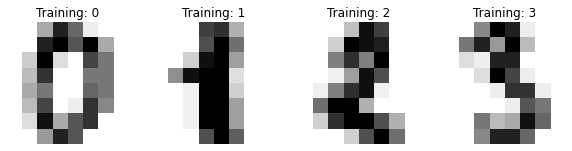

In [83]:
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

**DATA PREPROCESSING**
FLATTEN IMAGE

In [84]:
df.images.shape

(1797, 8, 8)

In [85]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [86]:
df.images[0].shape

(8, 8)

In [87]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [88]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [89]:
data[0].shape

(64,)

In [90]:
data.shape

(1797, 64)

**SCALING DATA**

In [91]:
data.min()

0.0

In [92]:
data.max()

16.0

In [93]:
data = data/16

In [94]:
data.min()

0.0

In [95]:
data.max()

1.0

In [ ]:
data[0]

**TRAIN TEST SPLIT DATA**

In [97]:
from sklearn.model_selection import train_test_split

In [130]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size = 0.3)

In [131]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**RANDOM FOREST MODEL**

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf = RandomForestClassifier()

In [134]:
rf.fit(x_train,y_train)

RandomForestClassifier()

**PREDICT TEST DATA**

In [135]:
y_pred = rf.predict(x_test)

In [136]:
y_pred

array([6, 8, 8, 7, 6, 8, 2, 1, 5, 9, 4, 1, 1, 7, 3, 1, 0, 3, 8, 8, 2, 5,
       4, 4, 2, 2, 0, 8, 6, 5, 0, 1, 8, 5, 7, 8, 0, 8, 6, 6, 5, 8, 8, 2,
       9, 1, 3, 2, 5, 8, 6, 9, 1, 3, 9, 4, 0, 7, 2, 5, 8, 8, 4, 9, 1, 0,
       3, 9, 8, 7, 7, 5, 7, 5, 3, 2, 0, 3, 2, 8, 6, 9, 2, 2, 0, 9, 2, 1,
       1, 9, 6, 1, 5, 8, 9, 3, 5, 4, 6, 4, 8, 6, 8, 1, 5, 3, 7, 1, 2, 4,
       2, 4, 6, 9, 4, 2, 9, 6, 6, 0, 9, 3, 1, 8, 9, 7, 6, 7, 9, 6, 0, 0,
       9, 6, 1, 5, 9, 9, 6, 2, 2, 3, 9, 9, 1, 4, 4, 3, 2, 7, 0, 0, 0, 3,
       8, 6, 2, 0, 9, 2, 8, 5, 7, 4, 5, 5, 7, 1, 4, 5, 6, 2, 1, 5, 0, 3,
       2, 2, 6, 2, 4, 1, 0, 1, 1, 4, 5, 3, 0, 3, 9, 1, 1, 9, 3, 7, 8, 8,
       7, 4, 2, 2, 4, 0, 8, 0, 2, 9, 1, 9, 9, 0, 7, 1, 0, 8, 6, 0, 4, 0,
       2, 4, 3, 4, 1, 4, 8, 3, 1, 8, 4, 4, 4, 1, 5, 0, 8, 3, 8, 8, 1, 8,
       1, 1, 6, 4, 2, 4, 5, 9, 8, 5, 5, 1, 5, 4, 3, 5, 6, 2, 1, 0, 8, 0,
       7, 7, 3, 6, 1, 9, 8, 7, 6, 2, 5, 9, 3, 4, 5, 1, 0, 5, 0, 2, 7, 8,
       3, 5, 7, 9, 1, 4, 7, 5, 5, 3, 7, 6, 8, 1, 3,

**MODEL ACCURACY**

In [137]:
from sklearn.metrics import confusion_matrix, classification_report

In [138]:
confusion_matrix(y_test, y_pred)

array([[49,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 64,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 56,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 53,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 61,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 45]])

In [ ]:
print(classification_report(y_test, y_pred))